In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pmdarima import auto_arima

In [5]:
df = pd.read_csv('Data/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [6]:
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': 1})
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [8]:
df.set_index('date', inplace=True)
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [9]:
df.index.freq = 'MS'

<AxesSubplot: xlabel='date'>

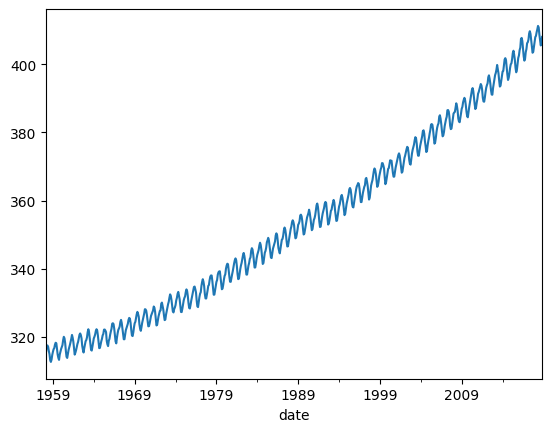

In [10]:
df['interpolated'].plot()

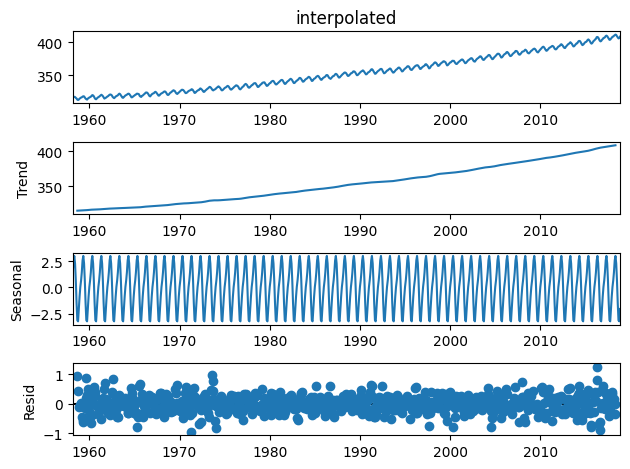

In [12]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

<AxesSubplot: xlabel='date'>

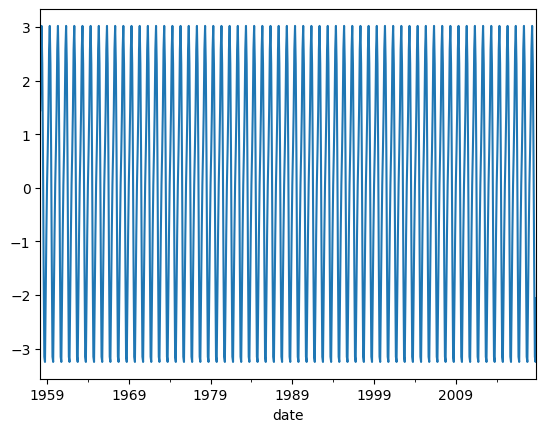

In [13]:
result.seasonal.plot()

In [14]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,2)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/st

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.287
Date:                            Sun, 11 Dec 2022   AIC                            424.573
Time:                                    15:47:17   BIC                            452.115
Sample:                                03-01-1958   HQIC                           435.201
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3539      0.048      7.308      0.000       0.259       0.449
ar.L2          0.0886      0.039      2.270      0.023       0.012       0.165
ma.L1         -0.7090      0.047    -15.113      0.000      -0.801      -0.617
ar.S.L12       0.9996      0.000   2685.337      0.000       0.999       1.000
ma.S.L12      -0.8644      0.021    -40.473      0.000      -0.906      -0.823
sigma2         0.0958      0.005     20.355      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.80   Prob(JB):                         0.11
Heteroskedasticity (H):               1.12   Skew:                            -0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
train = df.iloc[:717]
test = df.iloc[717:]

In [16]:
model = SARIMAX(train['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01395D-01    |proj g|=  6.33008D-01

At iterate    5    f=  5.63384D-01    |proj g|=  2.16014D-01

At iterate   10    f=  2.98076D-01    |proj g|=  3.95653D-02

At iterate   15    f=  2.91883D-01    |proj g|=  1.56004D-02

At iterate   20    f=  2.91201D-01    |proj g|=  1.62028D-02

At iterate   25    f=  2.89820D-01    |proj g|=  9.56182D-03

At iterate   30    f=  2.89768D-01    |proj g|=  1.41868D-03

At iterate   35    f=  2.86670D-01    |proj g|=  9.94422D-02

At iterate   40    f=  2.81603D-01    |proj g|=  3.11832D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  2.81584D-01    |proj g|=  3.78058D-04

At iterate   50    f=  2.81584D-01    |proj g|=  1.31865D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     86      2     0     0   1.319D-04   2.816D-01
  F =  0.28158368456530536     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.896
Date:                            Sun, 11 Dec 2022   AIC                            415.791
Time:                                    15:52:49   BIC                            443.233
Sample:                                03-01-1958   HQIC                           426.388
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3466      0.067      5.211      0.000       0.216       0.477
ar.L2          0.0832      0.014      5.979      0.000       0.056       0.110
ma.L1         -0.7008      0.058    -12.037      0.000      -0.815      -0.587
ar.S.L12       0.9997      0.000   3119.712      0.000       0.999       1.000
ma.S.L12      -0.8679      0.023    -38.496      0.000      -0.912      -0.824
sigma2         0.0951      0.005     20.459      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.82
Prob(Q):                              0.80   Prob(JB):                         0.09
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(train)
end = len(train) + len(test) - 1

In [18]:
pred = results.predict(start, end, typ='levels').rename('SARIMA pred')

<AxesSubplot: xlabel='date'>

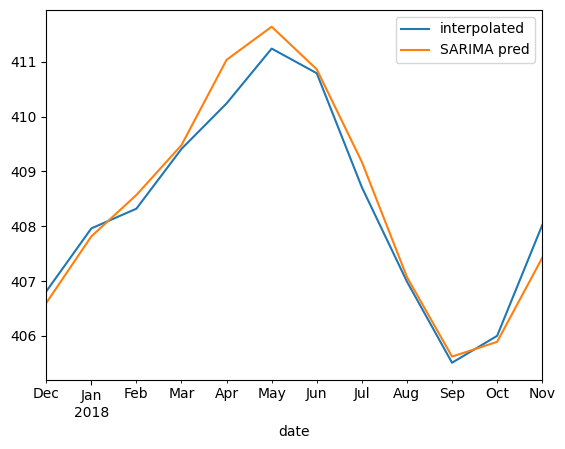

In [19]:
test['interpolated'].plot(legend=True)
pred.plot(legend=True)

In [20]:
from statsmodels.tools.eval_measures import rmse

In [21]:
error = rmse(test['interpolated'], pred)
error

0.3571500853488983

In [22]:
test['interpolated'].mean()

408.3333333333333

## 예측

In [23]:
model = SARIMAX(df['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97985D-01    |proj g|=  6.23769D-01


 This problem is unconstrained.



At iterate    5    f=  5.54559D-01    |proj g|=  2.10340D-01

At iterate   10    f=  3.12061D-01    |proj g|=  3.89985D-02

At iterate   15    f=  3.06233D-01    |proj g|=  9.65731D-03

At iterate   20    f=  3.04960D-01    |proj g|=  1.76551D-01

At iterate   25    f=  3.01012D-01    |proj g|=  7.75059D-03

At iterate   30    f=  3.00667D-01    |proj g|=  3.96160D-02

At iterate   35    f=  2.90578D-01    |proj g|=  6.14357D-02

At iterate   40    f=  2.84182D-01    |proj g|=  4.94125D-02

At iterate   45    f=  2.83001D-01    |proj g|=  1.92350D-02

At iterate   50    f=  2.82972D-01    |proj g|=  1.65789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA forecast')

<AxesSubplot: xlabel='date'>

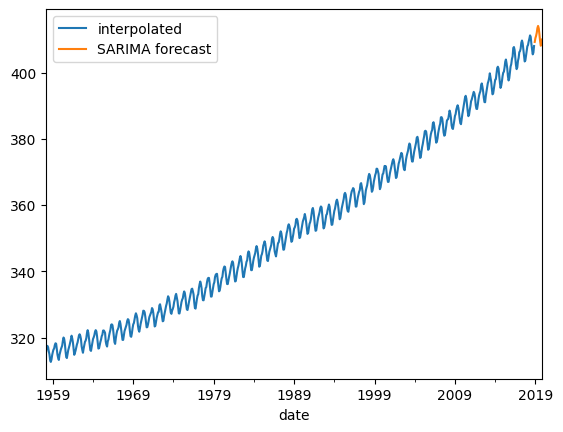

In [25]:
df['interpolated'].plot(legend=True)
fcast.plot(legend=True)